In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/ASUS/Desktop/MetehanHocaDDO/kaggleSale.csv")

https://www.kaggle.com/datasets/arishmam/sales-data

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          381 non-null    float64
 1   Gender           390 non-null    object 
 2   Age              388 non-null    float64
 3   EstimatedSalary  387 non-null    float64
 4   Purchased        383 non-null    float64
 5   satisfied        386 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.9+ KB


In [4]:
data.drop("User ID",axis=1,inplace=True)

<Axes: >

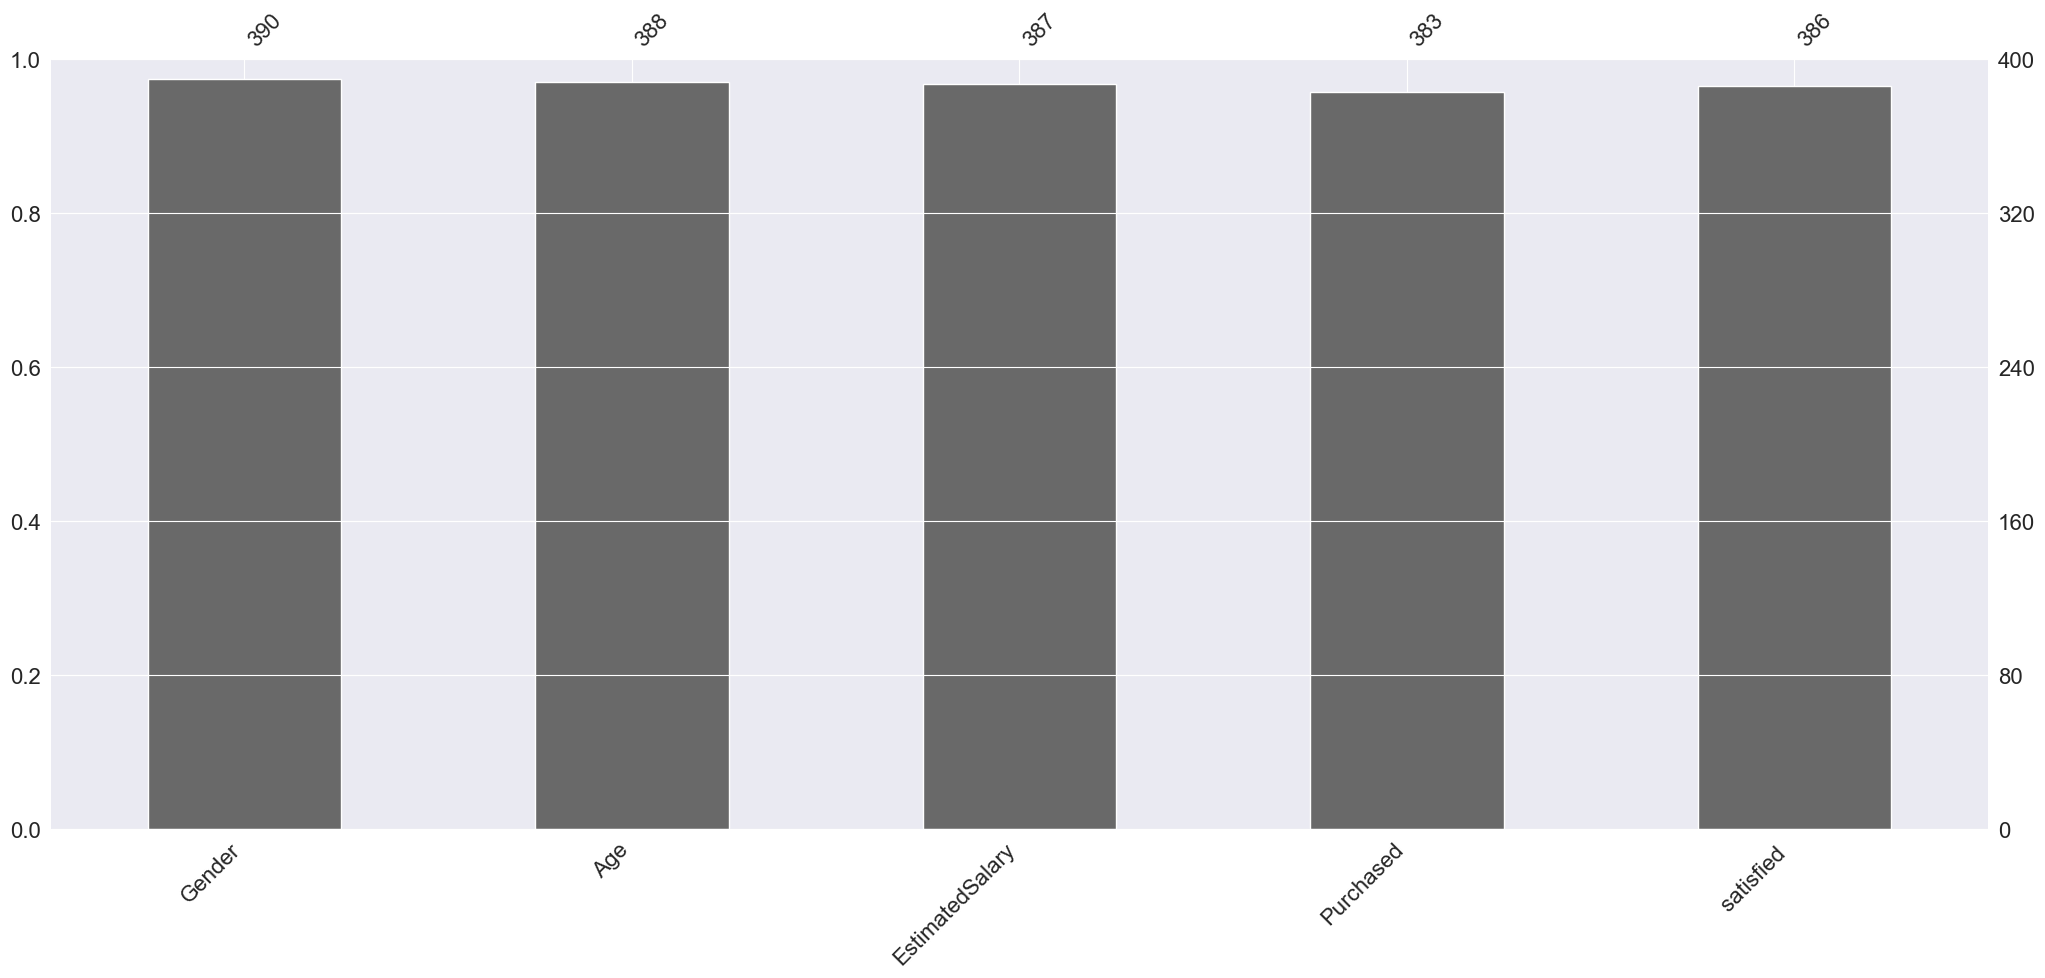

In [5]:
import missingno as msno
msno.bar(data)

<Axes: >

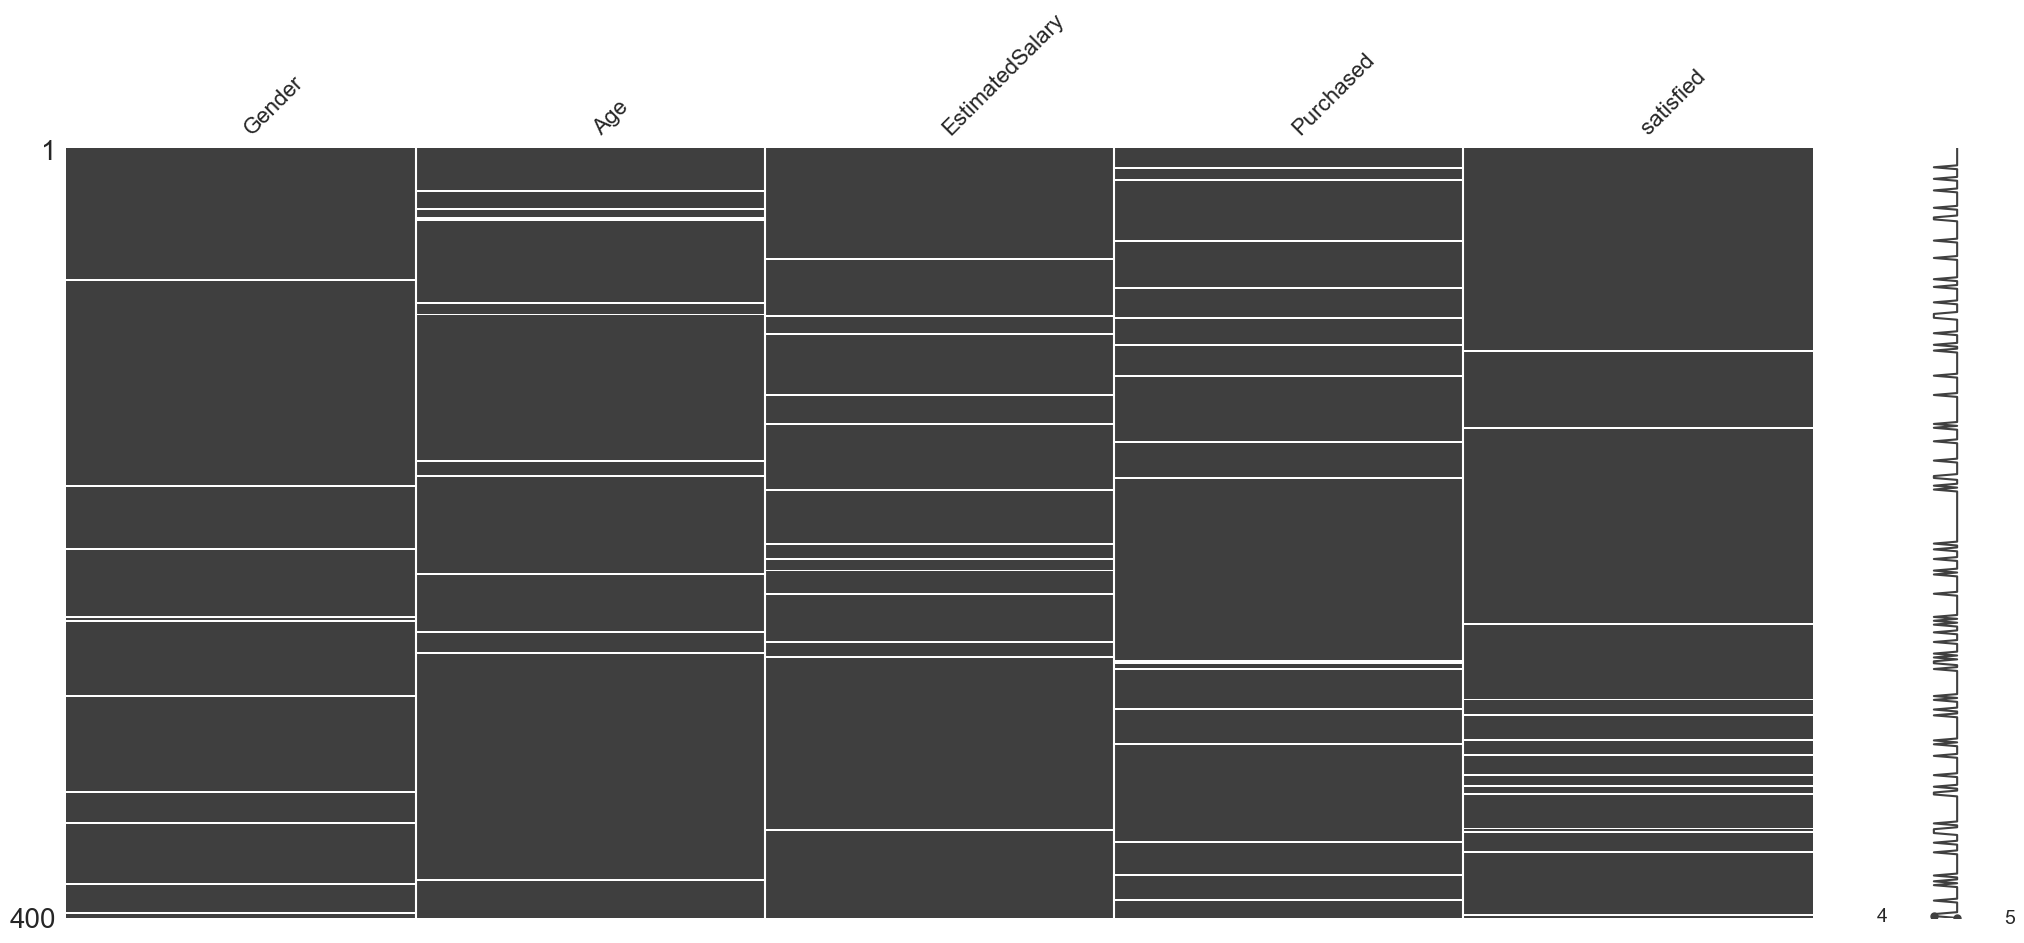

In [6]:
msno.matrix(data)

In [7]:
from sklearn.impute import SimpleImputer
mostFreq=SimpleImputer(strategy="most_frequent")
mostFreq.fit(data[["satisfied ","Gender"]])
data[["satisfied ","Gender"]]=mostFreq.transform(data[["satisfied ","Gender"]])

In [8]:
new_data=data[["EstimatedSalary",'satisfied ']].groupby(by="satisfied ").apply(lambda x: x.fillna(x.mean()))
data["EstimatedSalary"]=new_data[["EstimatedSalary"]].to_numpy()

In [9]:
new_data=data[["Age","Purchased",'satisfied ']].groupby(by="satisfied ").transform(lambda x: x.fillna(x.median()))
data[["Age","Purchased"]]=new_data[["Age","Purchased"]].to_numpy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    float64
 4   satisfied        400 non-null    object 
dtypes: float64(3), object(2)
memory usage: 15.8+ KB


In [11]:
data.head()

,Gender,Age,EstimatedSalary,Purchased,satisfied
0,Male,19.0,19000.0,0.0,no
1,Male,35.0,20000.0,0.0,no
2,Female,26.0,43000.0,0.0,no
3,Female,27.0,57000.0,0.0,no
4,Male,19.0,76000.0,0.0,no


In [12]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder


In [13]:
ohEnc=OneHotEncoder()
dataEnc=ohEnc.fit_transform(data[["Gender","satisfied "]])
data=pd.concat([data,pd.DataFrame(dataEnc.toarray(),columns=ohEnc.get_feature_names_out().tolist())],axis=1)
data.drop("Gender",axis=1,inplace=True)
data.drop("satisfied ",axis=1,inplace=True)
data.drop("satisfied _no",axis=1,inplace=True)

In [14]:
data.iloc[:,4].unique()

array([1., 0.])

In [15]:
y=data["satisfied _yes"]
X=data.drop("satisfied _yes",axis=1)

In [16]:
y.value_counts()

satisfied _yes
1.0    300
0.0    100
Name: count, dtype: int64

In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: satisfied _yes
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    float64
 2   Purchased        400 non-null    float64
 3   Gender_Female    400 non-null    float64
 4   Gender_Male      400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [20]:
y.value_counts()

satisfied _yes
0.0    300
1.0    300
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [23]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
kfold=KFold(n_splits=5)
model=GridSearchCV(DecisionTreeClassifier(),refit = True, verbose=2,cv=kfold,param_grid=param_grid,scoring='accuracy').fit(X_train,y_train)
pred=model.predict(X_test)




Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, m

In [24]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix


In [25]:
confusion_matrix(y_test,pred)

array([[53,  7],
       [10, 50]])

In [26]:
print(f"Accuracy: {accuracy_score(y_test,pred)}")
print(f"recall_score: {recall_score(y_test,pred)}")
print(f"precision_score: {precision_score(y_test,pred)}")
print(f"f1_score: {f1_score(y_test,pred)}")

Accuracy: 0.8583333333333333
recall_score: 0.8333333333333334
precision_score: 0.8771929824561403
f1_score: 0.8547008547008547


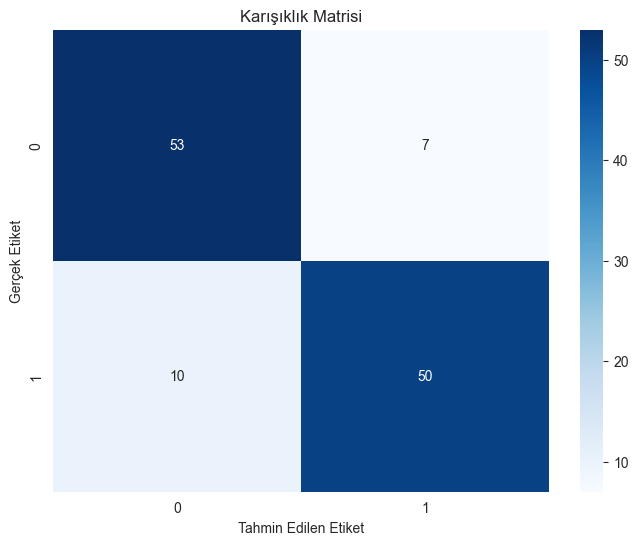

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d', cmap='Blues')

plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()